In [ ]:
'''

Ensemble Learning :
    - Model that makes prediction based on number of different model

In [ ]:
'''

Introduction to Ensemble Learning

    Basic Ensemble Techniques
        1. Max Voting
        2. Averaging
        3. Weighted Average

    Advanced Ensemble Techniques
       1. Stacking
       2. Blending
       3. Bagging
       4. Boosting
       
    Algorithms based on Bagging and Boosting
        1.Bagging
            1. Bagging meta-estimator
            2. Random forest
            3. Extra Trees Algorithm
        
        2.Boosting
            1. AdaBoost
            2. GBM
            3. XGBM
            4. Light GBM
            5. CatBoost 
            6. IsolationForest

In [ ]:
'''
Max Voting:()
    - A voting ensemble works by combining the predictions from multiple models. It can be used for classification or 
      regression.
    - In the case of regression, this involves calculating the average of the predictions from the models
    - In the case of classification, the predictions for each label are summed and the label with the majority vote is 
      predicted.
      
      Regression Voting Ensemble: Predictions are the average of contributing models.
      Classification Voting Ensemble: Predictions are the majority vote of contributing models.
      
There are two approaches to the majority vote prediction for classification; they are hard voting and soft voting.
    1. Hard Voting(majority voting)). Predict the class with the largest sum of votes from models
        
        Ex: Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output.
            Hence A will be the final prediction.
        
    2. Soft Voting. Predict the class with the largest summed probability from models.
            
            Ex: The prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40).So the average for 
                class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability 
                averaged by each classifier.

In [ ]:
# uisng Mode to finalize the preduction

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [ ]:
# 'VotingClassifier' in SkLearn

from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
'''
Averaging:
    - Multiple predictions are made for each data point in averaging. 
    - In this method, we take an average of predictions from all the models and use it to make the final prediction.

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

In [ ]:
'''
Weighted Average
    - Extension of the averaging method.All models are assigned different weights defining the importance of each model for 
      prediction. 

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3 + pred2*0.3 + pred3*0.4)

In [ ]:
'''
Stacking Ensemble Learning :
    - Some Time called as Stacked Generalization
    - It uses predictions from multiple models (for example decision tree, knn or svm) to build a new model.
    
How Stacking Ensemble Works


Steps:
    1. The train set is split into 10 parts.
    2. A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part.
    3. The base model (in this case, decision tree) is then fitted on the whole train dataset.
    4. Using this model, predictions are made on the test set.
    5. Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the 
       train set and test set.
    6. The predictions from the train set are used as features to build a new model
    7. This model is used to make final predictions on the test prediction set.

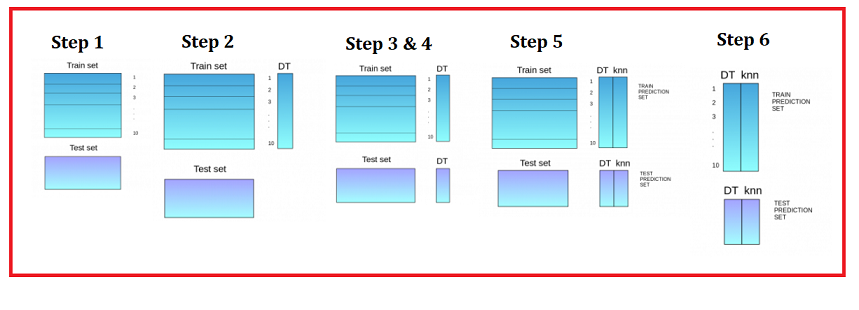

In [ ]:
def Stacking(model,train,y,test,n_fold):
    
   folds = StratifiedKFold(n_splits=n_fold,random_state=1)
   test_pred = np.empty((test.shape[0],1),float)
   train_pred = np.empty((0,1),float)

   for train_indices,val_indices in folds.split(train,y.values):
      x_train,x_val = train.iloc[train_indices],train.iloc[val_indices]
      y_train,y_val = y.iloc[train_indices],y.iloc[val_indices]

      model.fit(X=x_train,y=y_train)
      train_pred = np.append(train_pred,model.predict(x_val))
      test_pred = np.append(test_pred,model.predict(test))
    
    return test_pred.reshape(-1,1),train_pred

In [ ]:
# Model 1
model1 = tree.DecisionTreeClassifier(random_state=1)
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)


# Model 2
model2 = KNeighborsClassifier()
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

# Create a third model, logistic regression, on the predictions of the decision tree and knn models.
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

In [ ]:
'''
Blending Ensemble Learning
    - Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make 
      predictions.
    - In other words, unlike stacking, the predictions are made on the holdout(validation) set only.
    
Steps:
    1. The train set is split into training and validation sets.
    2. Model(s) are fitted on the training set.
    3. The predictions are made on the validation set and the test set.
    4. The validation set and its predictions are used as features to build a new model.
    5. This model is used to make final predictions on the test and meta-features.
      

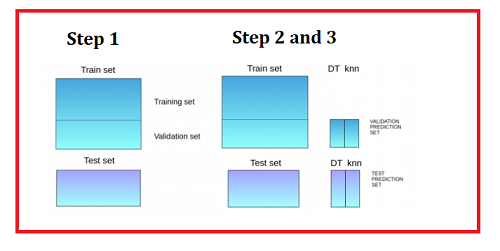

In [ ]:
# Model 1
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)

val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)

val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

# Model 2
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)

val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)

val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

# Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.

df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

### Bagging and Boosting

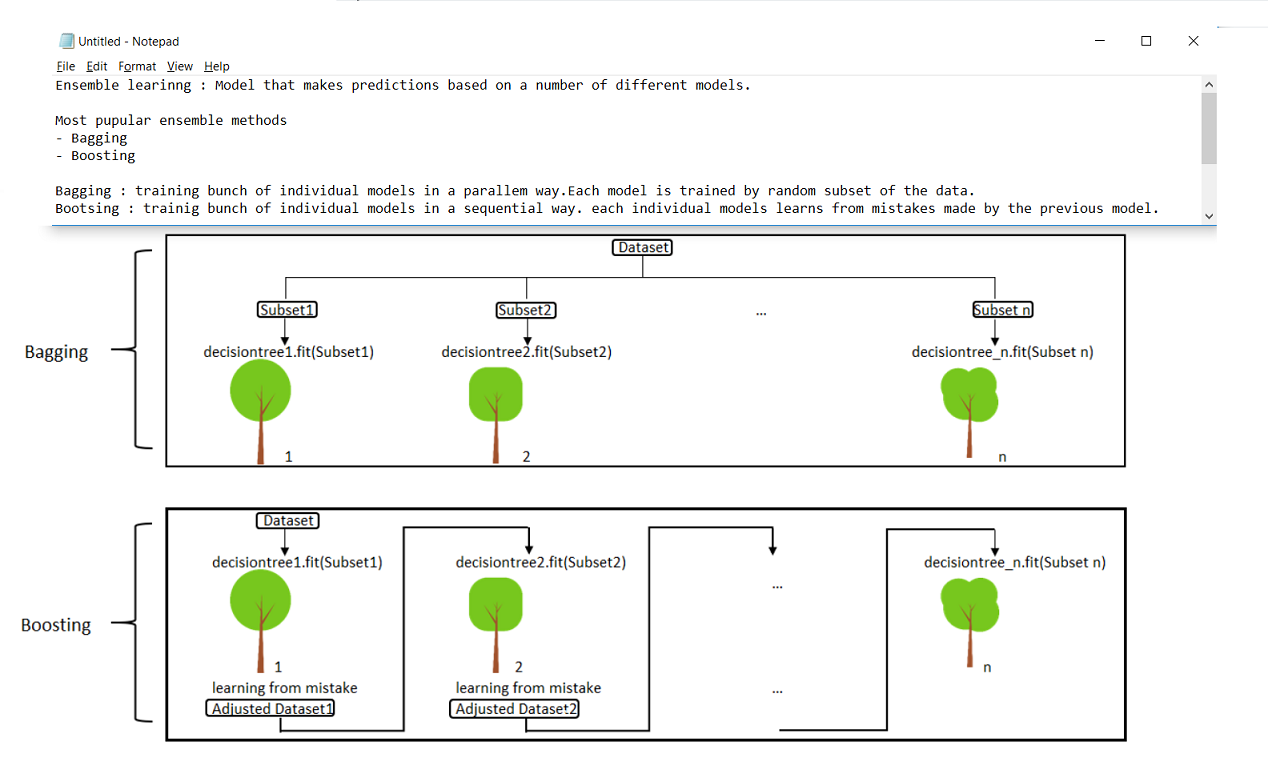

### Bagging

In [ ]:
'''
Bagging:
    - Training bunch of individual models in a parallel way. each model is trained by random subset of the data

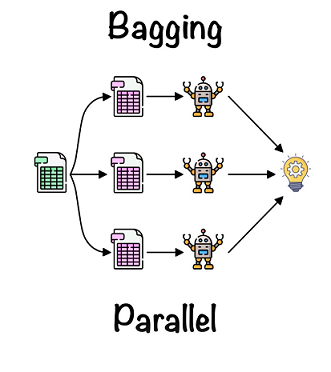

In [ ]:
'''
Bagging Algorithms
    1. Bagging Classifer (Bagging Meta Estimator)
    2. Random Forest 
    3. Extra Trees Algorithm

### Boosting

In [ ]:
'''
Boosting:
    - Training bunch of individual models in a sequential way. each individual models learns from mistake made by the previous 
      model.

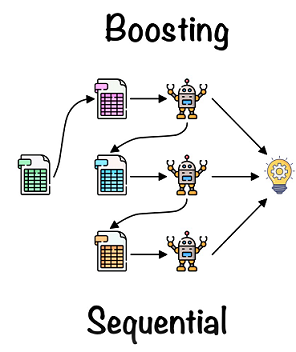

In [ ]:
'''
Boosting Algorithms
    1. AdaBoost (Regression / Classification)
    3. Gradient Boosting (Regression / Classification)
    4. XG Boost(Extreme Gradient Boosting)
    5. Light GBM
    6. CatBoost
    7. IsolationForest

### How Boosting Works

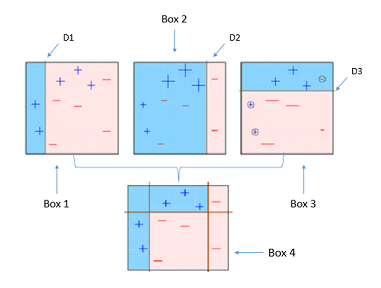

In [ ]:
'''

Four classifiers (in 4 boxes), shown above, are trying hard to classify + and - classes as homogeneously as possible. 
Let's understand this picture well.

Box 1: The first classifier creates a vertical line (split) at D1. 
       It says anything to the left of D1 is + and anything to the right of D1 is -. 
       However, this classifier misclassifies three + points.

Box 2: The next classifier says don't worry I will correct your mistakes. 
       Therefore, it gives more weight to the three + misclassified points (see bigger size of +) and creates a vertical 
       line at D2. Again, it says, anything to right of D2 is - and left is +.  
       Still, it makes mistakes by incorrectly classifying three - points.

Box 3: The next classifier continues to bestow support. Again, it gives more weight to the three - misclassified points 
       and creates a horizontal line at D3. Still, this classifier fails to classify the points (in circle) correctly.
       Remember that each of these classifiers has a misclassification error associated with them.
       Boxes 1,2, and 3 are weak classifiers. These classifiers will now be used to create a strong classifier Box 4.

Box 4: It is a weighted combination of the weak classifiers. As you can see, it does good job at classifying all the 
       points correctly.

In [ ]:
'''
Difference between Bagging and Boosting
    - Bagging is a method of merging the same type of predictions.
    - Boosting is a method of merging different types of predictions. 
    
    - Bagging decreases variance, not bias, and solves over-fitting issues in a model.
    - Boosting decreases bias, not variance
    
    - In Bagging, each model receives an equal weight. 
    - In Boosting, models are weighed based on their performance.
    
    - Models are built independently in Bagging. 
    - New models are affected by a previously built model’s performance in Boosting.
    
    - Bagging is usually applied where the classifier is unstable and has a high variance. 
    - Boosting is usually applied where the classifier is stable and simple and has high bias.


### Guidelines to select the right boosting technique

In [ ]:
'''
1. Any boosting technique is much better than decision trees and random forests except for parallelizing the training process.
2. You can start with a basic boosting technique such as AdaBoost, or Gradient Boosting and then you can move to an 
   enhanced technique such as XGBoost.
3. LightGBM and CatBoost are great alternatives to XGBoost.
4. If you’ve larger datasets, consider using LightGBM or CatBoost. LightGBM is the best option.
5. If your dataset has categorical features, consider using LightGBM or CatBoost. 
   Both can handle categorical features that are not already encoded. 
   CatBoost is the best option to deal with categorical features.
6. XGBoost has some more generalization capabilities than other boosting techniques. In performance-wise, it is good.
7. LightGBM has the fastest execution time.
8. When we consider both performance and execution time together, LightGBM is the best option.

9. One of the major drawbacks of boosting techniques is that overfitting can easily happen
10. 'Early stopping' techniques  can be used to solve the overfitting in boosting algorithms 

### Isolation Forest

In [ ]:
'''
Isolation Forest
    - Isolation Forests(IF), similar to Random Forests, are build based on decision trees
    - It is an unsupervised model (Outlier detection)
    - Isolation Forest is an outlier detection technique that identifies anomalies instead of normal observations
    - Similarly to Random Forest, it is built on an ensemble of binary (isolation) trees

How It Works?
    - Randomly sub-sampled data is processed in a tree structure based on randomly selected features
    - The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them.
    - Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate 
      them from other observations.